In [1]:
from matplotlib import pyplot as plt
import numpy as np

from src.image_process.image_io import LoadImage

import src.image_process.pre_process as prep

import src.image_process.mask.mask_getters as maget

from src.image_process.edp_center.center_optimization.opt_funcs import Area
from src.image_process.edp_center.centroid import get_centroid
from src.image_process.edp_center.center_optimization.optimization import optimize_center

from src.image_process.diffraction_pattern import eDiffractionPattern
from src.image_process.polar.polar_representation import PolarRepresentation
from src.image_process.polar.rotational_average import RotationalAverage

In [2]:
file_path = 'data/285 mm 64f 1_5s ouro 8sb.dm3'
load_image = LoadImage(file_path=file_path)

data = load_image.data

c:\Users\diego.nogueira\AppData\Local\Programs\Python\Python312\Lib\site-packages\cupy\_environment.py:217: UserWarning: CUDA path could not be detected. Set CUDA_PATH environment variable if CuPy fails to load.
  warnings.warn(


In [3]:
mean_mask = maget.MeanTreshMask(.1)
mask = maget.superpose_masks(data, [mean_mask])

In [4]:
penalty_func = Area(data, mask).get_penalty_func()
centroid = get_centroid(data)
center = optimize_center(penalty_func, data.shape, initial_guess=centroid)
center

(1111.0000000288394, 993.99999989087)

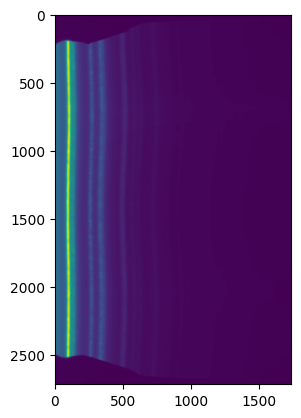

In [5]:
edp = eDiffractionPattern(data, center, mask)
polar_representation = PolarRepresentation(edp=edp)

polar_representation.radial_range = (0.06, .7)

plt.imshow(polar_representation.polar_image)

In [6]:
from src.image_process.ellipse.elp_params import EllipseParams

ellipse_params = EllipseParams(edp=edp)


In [7]:
params = ellipse_params.measure_ellipse_params()
params

{'axis_ratio': 1.034357096592581, 'orientation': 8.444490548610878}

In [8]:
from src.image_process.ellipse.elp_correction import correct_ellipse

res = correct_ellipse(edp = edp, ellipse_params = params)

plt.imshow(res)

TypeError: Rotate.__init__() missing 1 required positional argument: 'center'

In [ ]:
data = res.copy()